<a href="https://colab.research.google.com/github/SubhamZap/Similar-Face-Recognition/blob/main/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = np.load('/content/drive/MyDrive/Computer Vision/olivetti faces/olivetti_faces.npy')
target = np.load('/content/drive/MyDrive/Computer Vision/olivetti faces/olivetti_faces_target.npy')

In [10]:
print('There are {} images in dataset'.format(len(data)))
print('There are {} unique images in target dataset'.format(len(np.unique(target))))

There are 400 images in dataset
There are 40 unique images in target dataset


In [11]:
np.unique(target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39], dtype=int32)

In [88]:
data[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [13]:
data.shape

(400, 64, 64)

In [18]:
import matplotlib.pyplot as plt
def display_40_distinct_images(images, uniqueIds):
  fig, axArr = plt.subplots(nrows=4, ncols=10,figsize=(18, 9))
  axArr = axArr.flatten()

  for id in uniqueIds:
    image_id = id*10
    axArr[id].imshow(images[image_id], cmap='gray')
    axArr[id].set_title('face ID: {}'.format(id))

  fig.suptitle('There are 40 distinct people in the dataset')

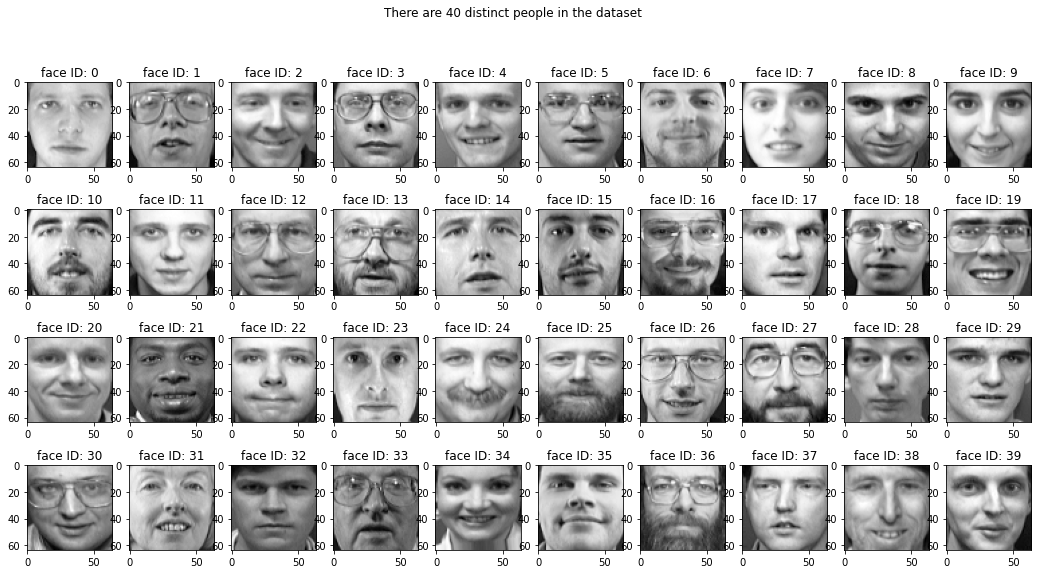

In [19]:
display_40_distinct_images(data, np.unique(target))

In [26]:
def display_10_image_of_each_faces(images, subject_id):
  cols = 10
  rows = len(subject_id)
  fig, axArr = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))

  for i, id in enumerate(subject_id):
    for j in range(cols):
      image_index = id*10+j
      axArr[i, j].imshow(images[image_index], cmap='gray')
      axArr[i, j].set_title('Face: {} of id: {}'.format(j, id))
  
  fig.suptitle('10 images of each face')

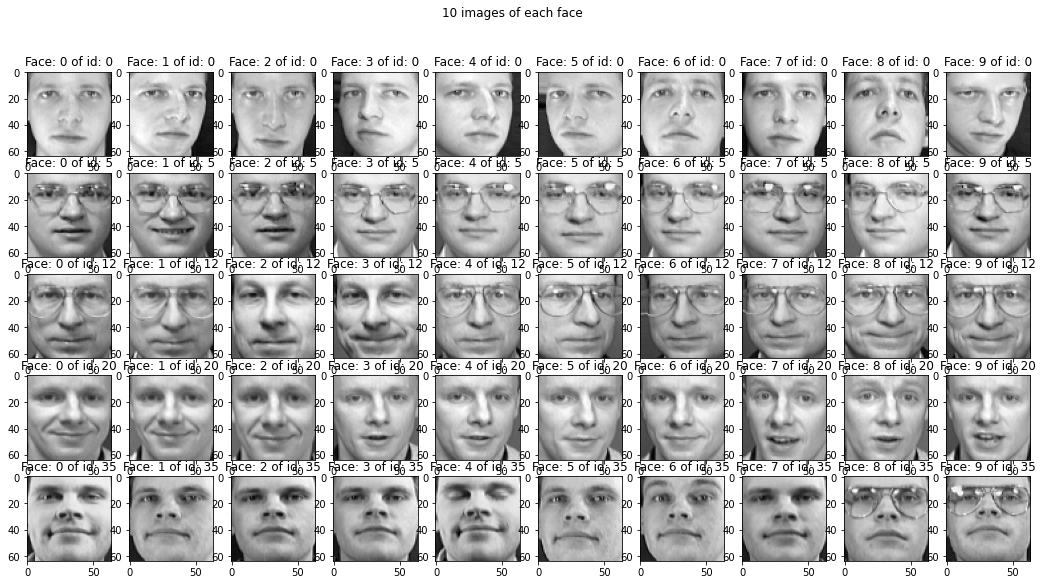

In [28]:
display_10_image_of_each_faces(data, [0, 5, 12, 20, 35])

In [29]:
X = data.reshape(data.shape[0], data.shape[1]*data.shape[2])
print(X.shape)

(400, 4096)


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(320, 4096)
(320,)


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [39]:
target[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)

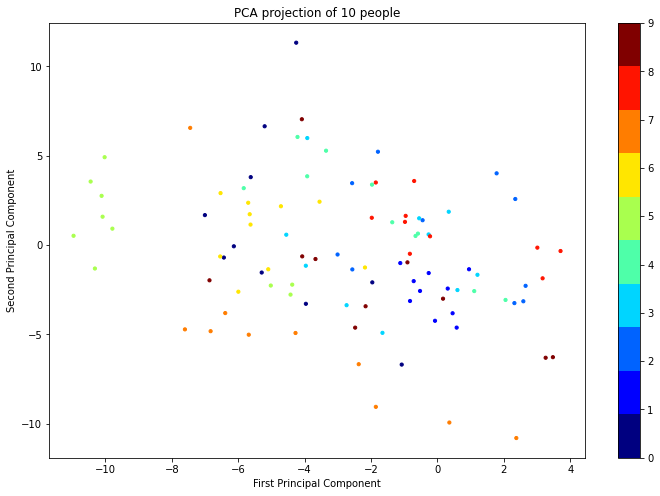

In [42]:
number_of_people = 10
index_range = number_of_people*10
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
scatter = plt.scatter(X_pca[:index_range, 0],
                      X_pca[:index_range, 1],
                      c=target[:index_range],
                      s=10,
                      cmap=plt.get_cmap('jet', number_of_people))
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_title('PCA projection of {} people'.format(number_of_people))
fig.colorbar(scatter)

Text(0, 0.5, 'Explained Variance')

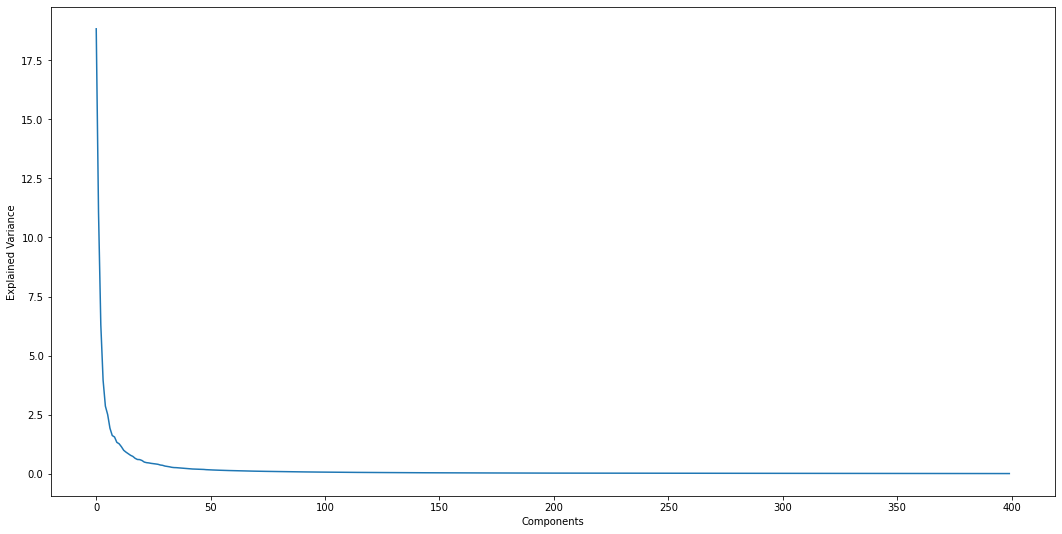

In [45]:
pca = PCA()
pca.fit(X)

plt.figure(figsize=(18, 9))
plt.plot(pca.explained_variance_)
plt.xlabel('Components')
plt.ylabel('Explained Variance')

In [46]:
n_components = 90

In [47]:
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=90)

Text(0.5, 1.0, 'Average face')

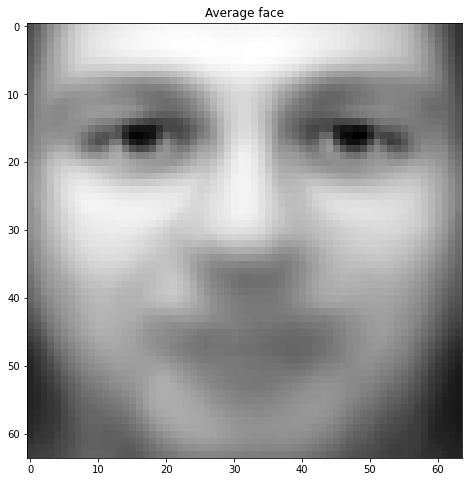

In [49]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap='gray')
ax.set_title('Average face')

In [50]:
len(pca.components_)

90

Text(0.5, 0.98, 'All eigenfaces')

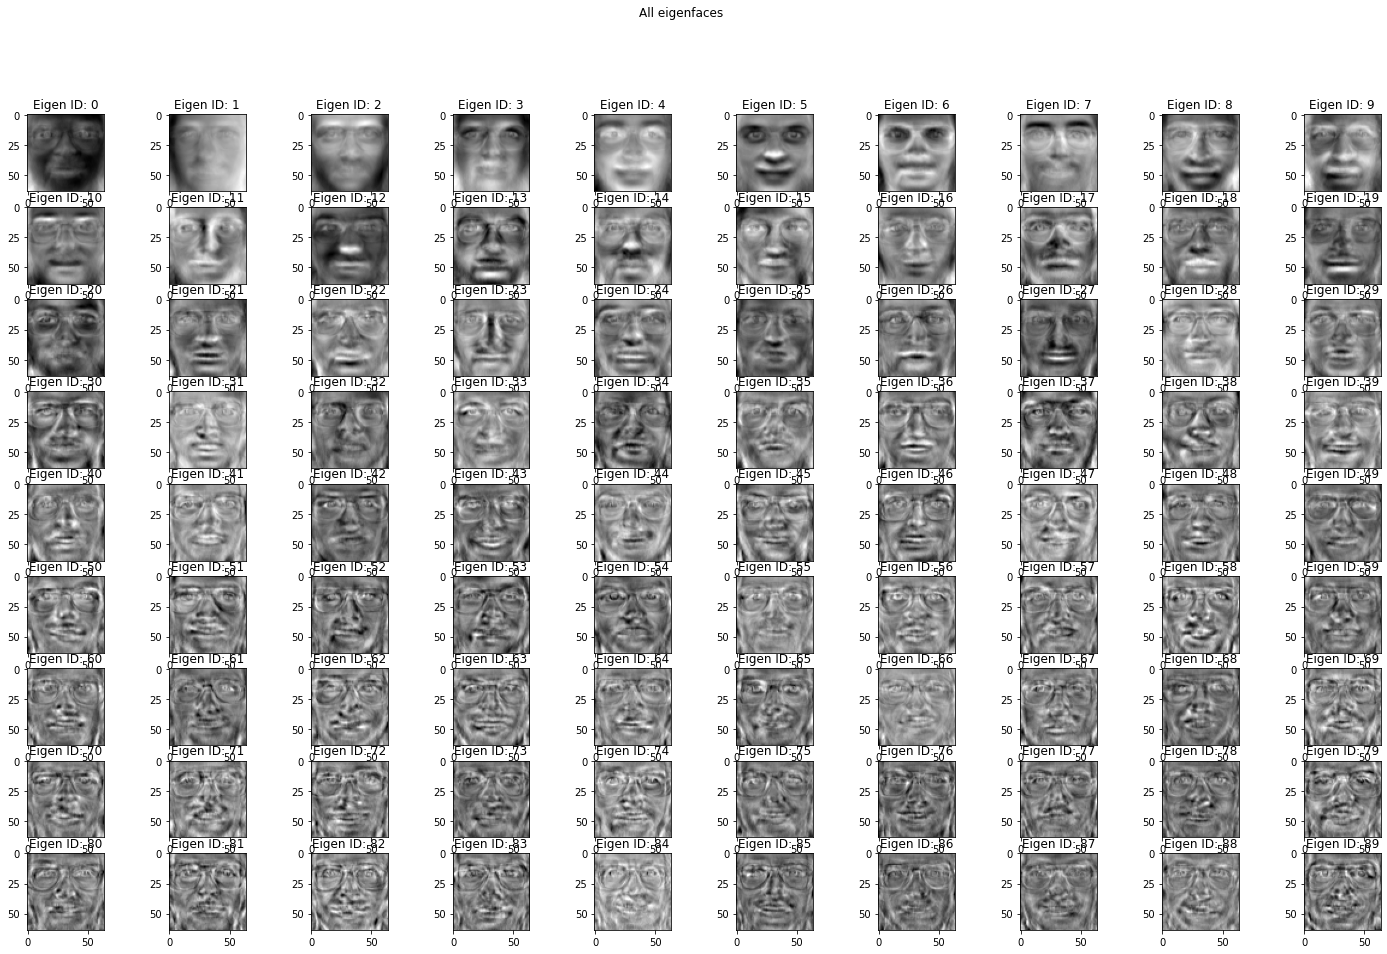

In [55]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))
cols = 10
rows = int(number_of_eigenfaces/cols)
fig, axArr = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 15))
axArr = axArr.flatten()

for i in range(number_of_eigenfaces):
  axArr[i].imshow(eigen_faces[i], cmap='gray')
  axArr[i].set_title('Eigen ID: {}'.format(i))

fig.suptitle('All eigenfaces'.format(10*'=', 10*'='))

In [56]:
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

In [64]:
from sklearn.metrics import accuracy_score, classification_report
for name, model in models:
  clf = model
  clf.fit(X_train_pca, y_train)
  y_pred = clf.predict(X_test_pca)

  print(10*'=', '{} Result'.format(name).upper(), 10*'=')
  print('Accuracy score: {:0.2f}'.format(accuracy_score(y_test, y_pred)))

========== LDA RESULT ==========
Accuracy score: 0.97


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


========== LR RESULT ==========
Accuracy score: 0.99
========== NB RESULT ==========
Accuracy score: 0.70
========== KNN RESULT ==========
Accuracy score: 0.89
========== SVM RESULT ==========
Accuracy score: 0.95


In [67]:
from sklearn.model_selection import cross_val_score, KFold

pca = PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)
for name, model in models:
  kfold = KFold(n_splits=5, shuffle=True, random_state=0)
  cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
  print("{} mean cross  validations score: {:.2f}".format(name, cv_scores.mean()))

LDA mean cross  validations score: 0.98


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR mean cross  validations score: 0.97
NB mean cross  validations score: 0.76
KNN mean cross  validations score: 0.79
SVM mean cross  validations score: 0.92


In [69]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, y_train)
y_pred = lda.predict(X_test_pca)
print("LDA accuracy score: {}".format(accuracy_score(y_pred, y_test)))

LDA accuracy score: 0.975


<Axes: >

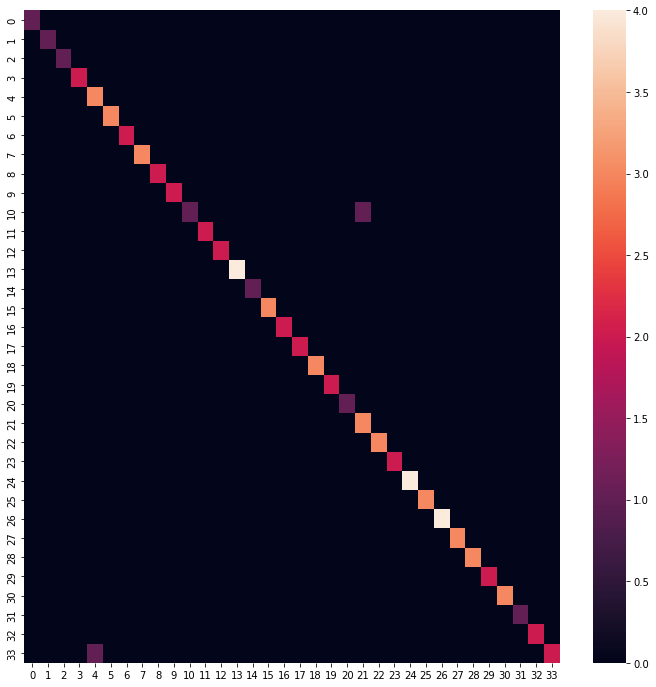

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(cm)

In [74]:
print("Classification report \n", classification_report(y_test, y_pred))

Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         4
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         2
   

In [75]:
from sklearn.model_selection import LeaveOneOut

loo_cv = LeaveOneOut()
clf = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(clf,
                            X_pca,
                            target,
                            cv=loo_cv
                            )
print("{} Leave One Out  cross-validation mean accuracy score: {:.2f}".format(clf.__class__.__name__,cv_scores.mean()))

LinearDiscriminantAnalysis Leave One Out  cross-validation mean accuracy score: 0.98


In [76]:
from sklearn.model_selection import LeaveOneOut

loo_cv = LeaveOneOut()
clf = LogisticRegression()
cv_scores = cross_val_score(clf,
                            X_pca,
                            target,
                            cv=loo_cv
                            )
print("{} Leave One Out  cross-validation mean accuracy score: {:.2f}".format(clf.__class__.__name__,cv_scores.mean()))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression Leave One Out  cross-validation mean accuracy score: 0.98


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
pred_obj = pca.transform(data[23].reshape(1, 4096))
pred = lda.predict(pred_obj)

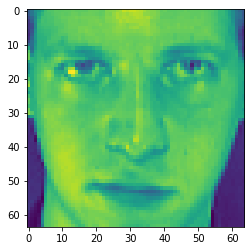

In [102]:
plt.imshow(data[pred].reshape(64,64))

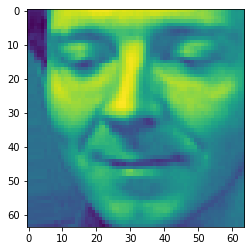

In [92]:
plt.imshow(data[23])

In [129]:
def prediction_images(image_id):
  pred_obj = pca.transform(data[image_id].reshape(1, 4096))
  pred = lda.predict(pred_obj)
  print(pred)
  plt.figure(figsize=(6,6))
  fig, axArr = plt.subplots(1, 2)
  print(3*'=', "Image to be predicted", 3*'=', "Image predicted", 3*'=')
  axArr[0].imshow(data[image_id])
  axArr[1].imshow(data[pred].reshape(64,64))

[20]
=== Image to be predicted === Image predicted ===


<Figure size 432x432 with 0 Axes>

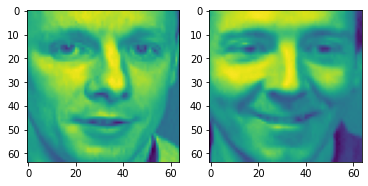

In [134]:
prediction_images(204)